In [1]:
import string

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

from wordcloud import WordCloud

In [2]:
df = pd.read_csv(Path('assignment-comp3222-comp6246-mediaeval2015-dataset/mediaeval-2015-trainingset.txt'), sep='\\t', engine='python')

In [3]:
df.info() # Done

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14483 entries, 0 to 14482
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweetId     14483 non-null  int64 
 1   tweetText   14483 non-null  object
 2   userId      14483 non-null  int64 
 3   imageId(s)  14483 non-null  object
 4   username    14483 non-null  object
 5   timestamp   14483 non-null  object
 6   label       14483 non-null  object
dtypes: int64(2), object(5)
memory usage: 792.2+ KB


In [4]:
df.shape 

(14483, 7)

In [5]:
imageId_values = df['imageId(s)'].value_counts()
print(imageId_values)

df['topic'] = df['imageId(s)'].str.extract(r'([a-zA-Z]+)_')

imageId(s)
sandyA_fake_29                   1115
sandyA_fake_42                    722
sandyA_fake_11                    638
sandyB_real_59                    634
sandyB_real_71                    585
                                 ... 
boston_real_23                      1
boston_real_01,boston_real_02       1
sandyB_real_95                      1
columbianChemicals_fake_04          1
sandyB_real_21                      1
Name: count, Length: 379, dtype: int64


/var/folders/d3/pp72ynv541ncyrk24k0dw9wc0000gn/T/ipykernel_1468/708776310.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_values.index, y=topic_values.values, palette='viridis')


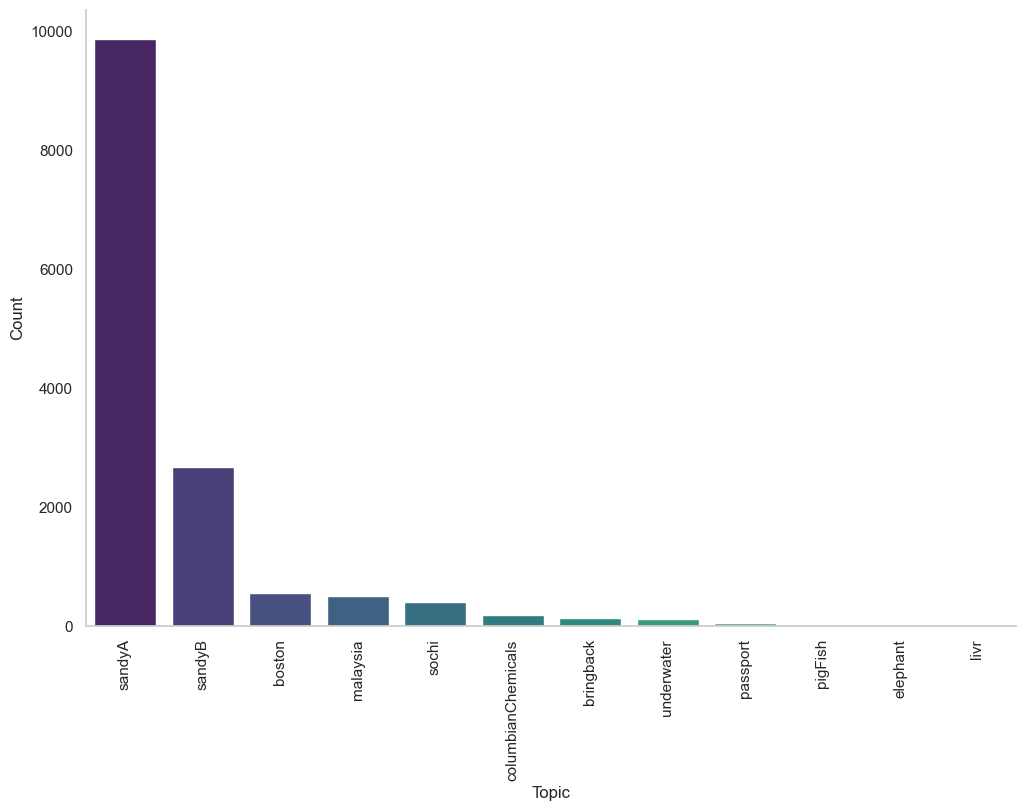

In [6]:
# Done
topic_values = df['topic'].value_counts()

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

sns.barplot(x=topic_values.index, y=topic_values.values, palette='viridis')

plt.xlabel('Topic')
plt.ylabel('Count')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(rotation=90)
plt.grid(False)
plt.savefig('topic_distribution_plot', bbox_inches='tight') 

In [7]:
print(topic_values) # Done

topic
sandyA                9860
sandyB                2663
boston                 546
malaysia               501
sochi                  402
columbianChemicals     185
bringback              131
underwater             113
passport                46
pigFish                 14
elephant                13
livr                     9
Name: count, dtype: int64


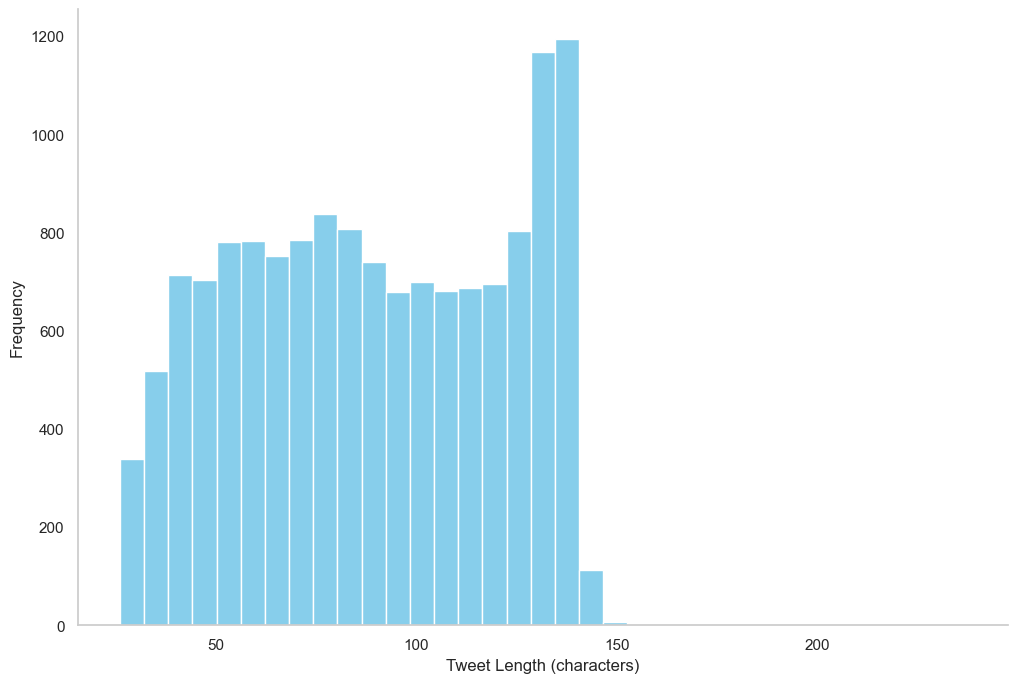

In [8]:
# Done
df['tweetLength'] = df['tweetText'].apply(len)

plt.figure(figsize=(12, 8))
plt.hist(df['tweetLength'], bins=35, color='skyblue')
plt.xlabel('Tweet Length (characters)')
plt.ylabel('Frequency')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(False)
plt.savefig('tweet_length_plot', bbox_inches='tight') 

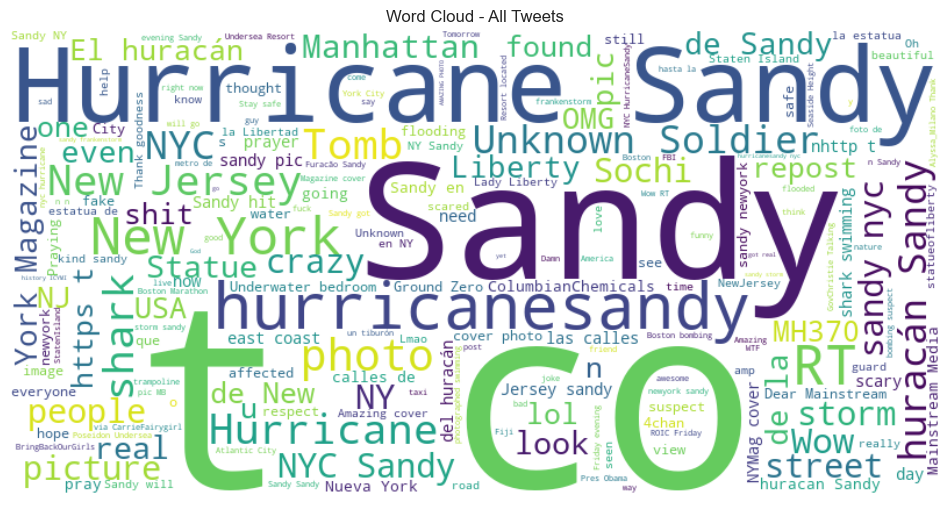

In [9]:
# Done
all_tweets_text = ' '.join(df['tweetText'])

wordcloud_all_tweets = WordCloud(width=800, height=400, background_color='white').generate(all_tweets_text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud_all_tweets, interpolation='bilinear')
plt.title('Word Cloud - All Tweets')
plt.axis('off')

plt.savefig('tweets_word_cloud', bbox_inches='tight') 

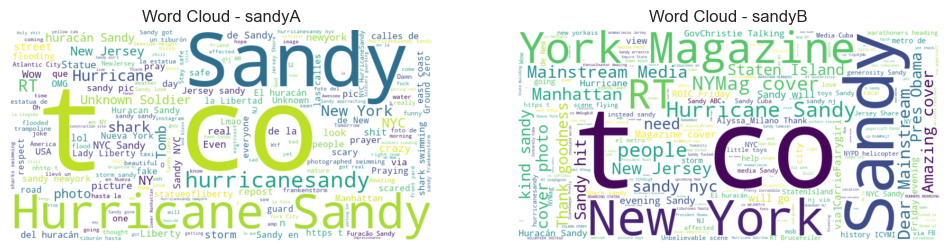

In [10]:
# Done
sandyA_tweets = df[df['imageId(s)'].str.contains('sandyA', case=False)]['tweetText']
sandyB_tweets = df[df['imageId(s)'].str.contains('sandyB', case=False)]['tweetText']

sandyA_text = ' '.join(sandyA_tweets)
sandyB_text = ' '.join(sandyB_tweets)

wordcloud_sandyA = WordCloud(width=800, height=400, background_color='white').generate(sandyA_text)
wordcloud_sandyB = WordCloud(width=800, height=400, background_color='white').generate(sandyB_text)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_sandyA, interpolation='bilinear')
plt.title('Word Cloud - sandyA')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_sandyB, interpolation='bilinear')
plt.title('Word Cloud - sandyB')
plt.axis('off')

plt.savefig('sandy_word_cloud', bbox_inches='tight') 

In [11]:
label_values = df['label'].value_counts()
print(label_values)

label
fake     6841
real     5009
humor    2633
Name: count, dtype: int64


/var/folders/d3/pp72ynv541ncyrk24k0dw9wc0000gn/T/ipykernel_1468/1841813837.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_values.index, y=label_values.values, palette='viridis', width=0.3)


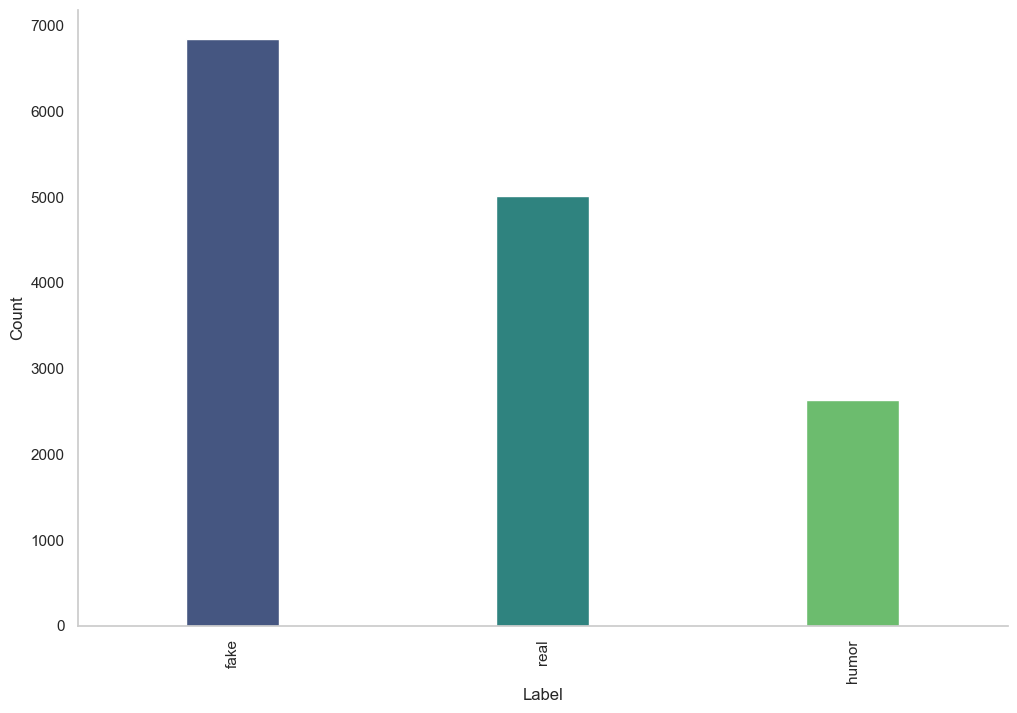

In [12]:
# IGNORE
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Adjust the width parameter to make bars skinnier
sns.barplot(x=label_values.index, y=label_values.values, palette='viridis', width=0.3)

plt.xlabel('Label')
plt.ylabel('Count')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(rotation=90)
plt.grid(False)
plt.show()

In [13]:
df['label'] = df['label'].replace('humor', 'fake')

label_values = df['label'].value_counts()
print(label_values)

label
fake    9474
real    5009
Name: count, dtype: int64


/var/folders/d3/pp72ynv541ncyrk24k0dw9wc0000gn/T/ipykernel_1468/2395666527.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_values.index, y=label_values.values, palette='viridis', width=0.3)


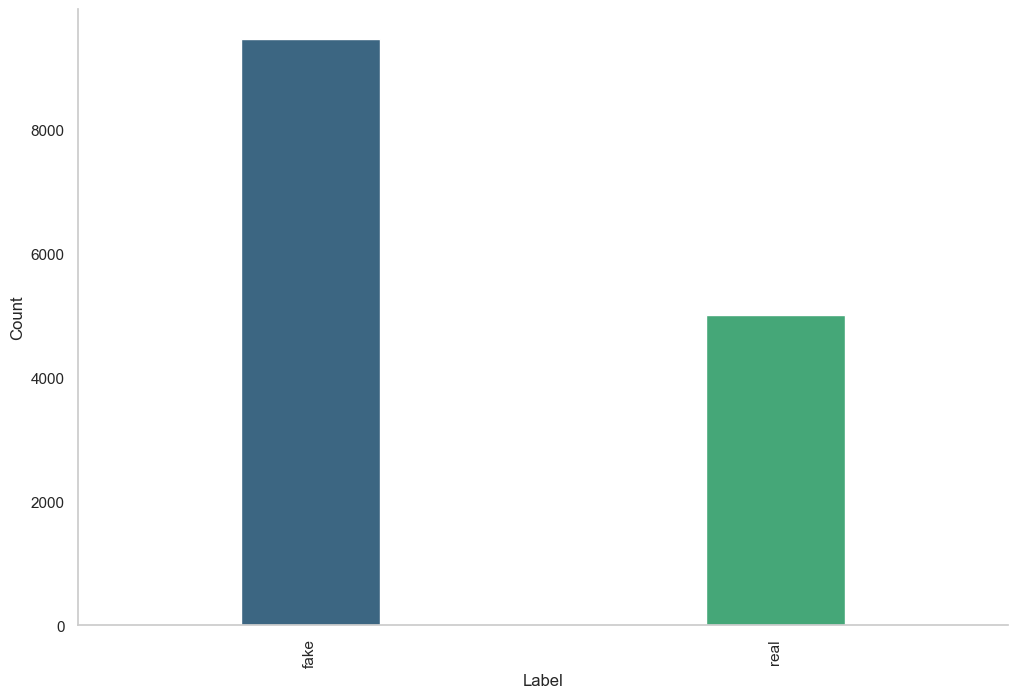

In [14]:
# Done
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

sns.barplot(x=label_values.index, y=label_values.values, palette='viridis', width=0.3)

plt.xlabel('Label')
plt.ylabel('Count')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(rotation=90)
plt.grid(False)
plt.savefig('label_distribution_plot.png', bbox_inches='tight')

<ul>
    <li>Supervised Learning</li>
    <li>Classification Task</li>
    <li>Batch Learning</li>
</ul>

In [15]:
df = pd.read_csv(Path('assignment-comp3222-comp6246-mediaeval2015-dataset/mediaeval-2015-testset.txt'), sep='\\t', engine='python')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3781 entries, 0 to 3780
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweetId     3781 non-null   int64 
 1   tweetText   3781 non-null   object
 2   userId      3781 non-null   int64 
 3   imageId(s)  3781 non-null   object
 4   username    3781 non-null   object
 5   timestamp   3781 non-null   object
 6   label       3781 non-null   object
dtypes: int64(2), object(5)
memory usage: 206.9+ KB


In [17]:
df.shape

(3781, 7)

In [18]:
imageId_values = df['imageId(s)'].value_counts()
print(imageId_values)

df['topic'] = df['imageId(s)'].str.extract(r'([a-zA-Z]+)_')

imageId(s)
syrianboy_1              1786
nepal_25                  801
nepal_01                  140
samurai_02                106
samurai_01,samurai_02     102
                         ... 
eclipse_01                  1
nepal_07                    1
nepal_15                    1
nepal_08                    1
eclipse_04                  1
Name: count, Length: 88, dtype: int64


/var/folders/d3/pp72ynv541ncyrk24k0dw9wc0000gn/T/ipykernel_1468/3742326304.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_values.index, y=topic_values.values, palette='viridis')


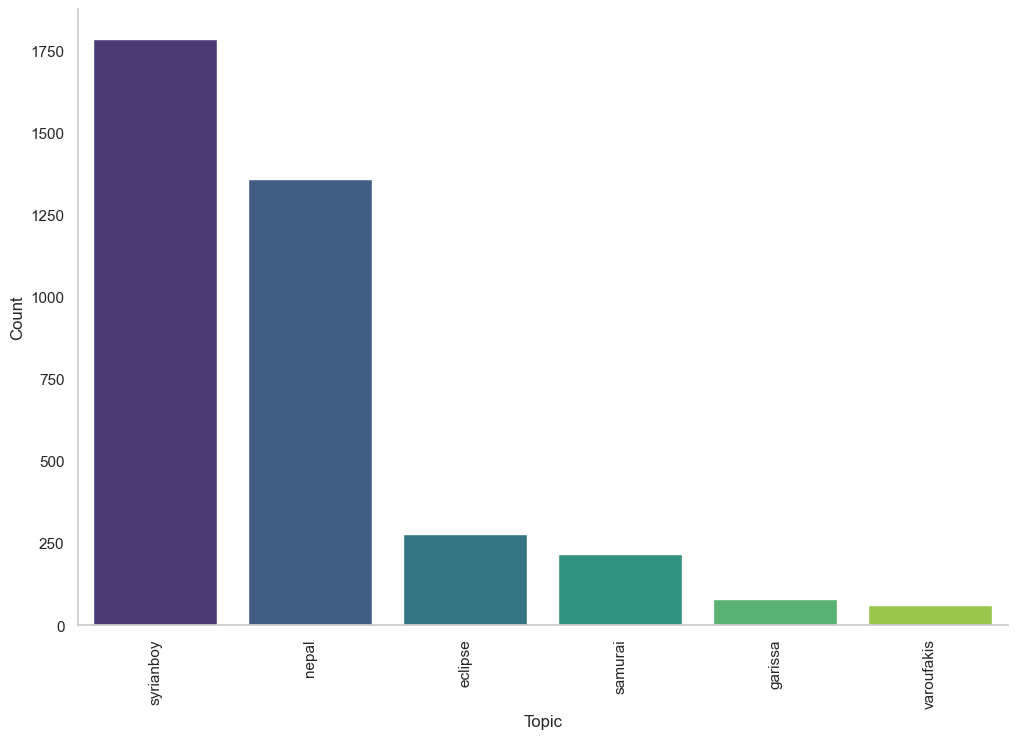

In [24]:
# Done
topic_values = df['topic'].value_counts()

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

sns.barplot(x=topic_values.index, y=topic_values.values, palette='viridis')

plt.xlabel('Topic')
plt.ylabel('Count')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(rotation=90)
plt.grid(False)
plt.savefig('test_topic_distribution_plot.png', bbox_inches='tight')

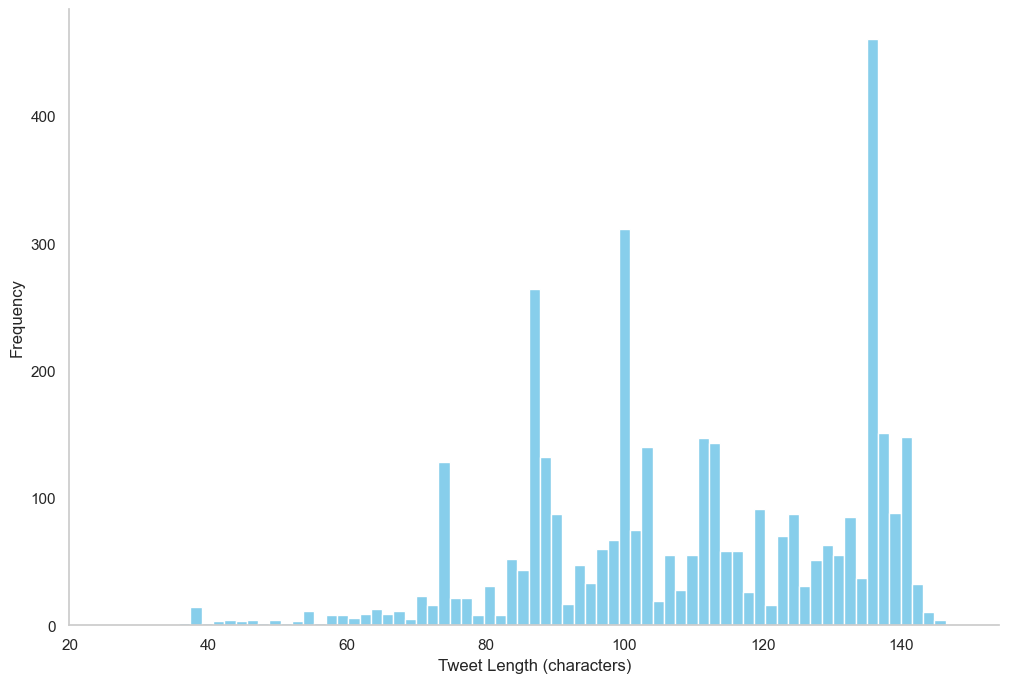

In [27]:
# IGNORE
df['tweetLength'] = df['tweetText'].apply(len)

plt.figure(figsize=(12, 8))
plt.hist(df['tweetLength'], bins=75, color='skyblue')
plt.xlabel('Tweet Length (characters)')
plt.ylabel('Frequency')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(False)
plt.savefig('test_tweet_length_plot', bbox_inches='tight') 

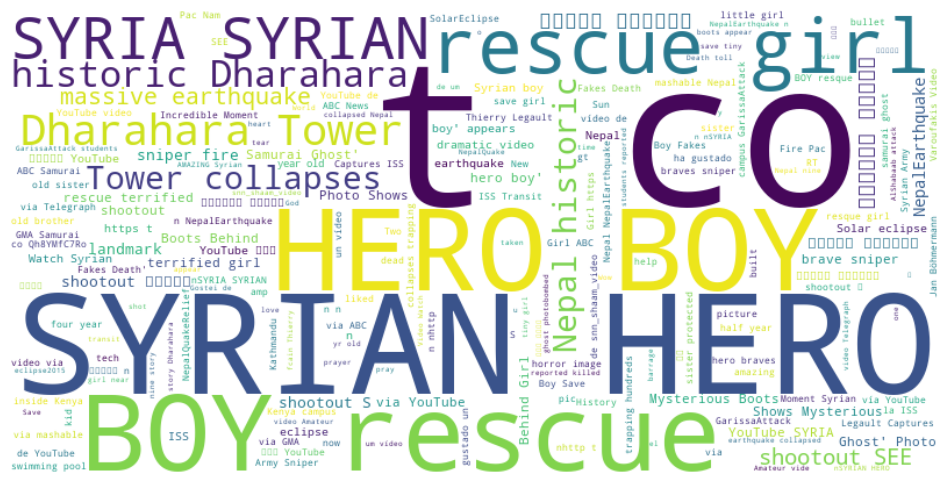

In [25]:
# Done
all_tweets_text = ' '.join(df['tweetText'])

wordcloud_all_tweets = WordCloud(width=800, height=400, background_color='white').generate(all_tweets_text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud_all_tweets, interpolation='bilinear')
plt.axis('off')
plt.savefig('test_word_cloud.png', bbox_inches='tight')

In [22]:
label_values = df['label'].value_counts()
print(label_values)

label
fake    2564
real    1217
Name: count, dtype: int64


/var/folders/d3/pp72ynv541ncyrk24k0dw9wc0000gn/T/ipykernel_1468/1156865491.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_values.index, y=label_values.values, palette='viridis', width=0.3)


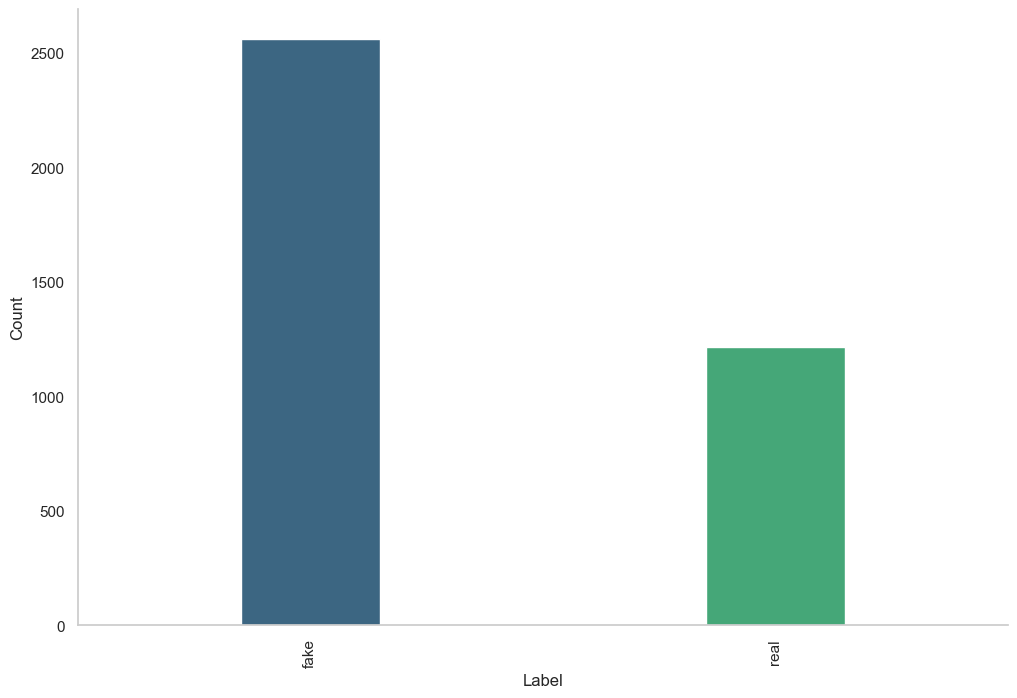

In [26]:
# Done
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

sns.barplot(x=label_values.index, y=label_values.values, palette='viridis', width=0.3)

plt.xlabel('Label')
plt.ylabel('Count')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(rotation=90)
plt.grid(False)
plt.savefig('test_label.png', bbox_inches='tight')